# Testing the Masked Autoencoder

A simple notebook that displays the training progress of the model and also plots some sample images produced by the masked autoencoder.

In [1]:
import os
import configparser
import torch
from utils.models_mae import build_model
from utils.dataloader import build_dataloader
from utils.analysis_fns import plot_progress, mae_predict, plot_batch

data_dir = '/arc/projects/unions/HSC_h5/'
model_name = 'mae_1'

# Determine device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print('Using Torch version: %s' % (torch.__version__))
print('Using a %s device' % (device))

# Directories
cur_dir = ''
config_dir = os.path.join(cur_dir, 'configs/')
model_dir = os.path.join(cur_dir, 'models/')
if data_dir is None:
    data_dir = os.path.join(cur_dir, 'data/')

# Load model configuration
config = configparser.ConfigParser()
config.read(config_dir+model_name+'.ini')

# Display model configuration
print('\nCreating model: %s'%model_name)
print('\nConfiguration:')
for key_head in config.keys():
    if key_head=='DEFAULT':
        continue
    print('  %s' % key_head)
    for key in config[key_head].keys():
        print('    %s: %s'%(key, config[key_head][key]))

# Construct the model and load pretrained weights
model_filename =  os.path.join(model_dir, model_name+'.pth.tar') 
model, losses, cur_iter = build_model(config, model_filename, device, build_optimizer=False)

# Data loader for the validation samples
dataloader = build_dataloader(os.path.join(data_dir, config['DATA']['val_data_file']), 
                              config['DATA']['norm_type'], 
                              batch_size=16, 
                              num_workers=0,
                              shuffle=True)

`fused_weight_gradient_mlp_cuda` module not found. gradient accumulation fusion with weight gradient computation disabled.


Using Torch version: 2.0.1+cu117
Using a cpu device

Creating model: mae_1

Configuration:
  DATA
    train_data_file: HSC_grid_GRIZY_64.h5
    val_data_file: HSC_galaxies_GRIZY_64.h5
    norm_type: zscore
  TRAINING
    batch_size: 64
    total_batch_iters: 1e6
    mask_ratio: 0.75
    norm_pix_loss: False
    weight_decay: 0.05
    init_lr: 0.0001
    final_lr_factor: 1e7
    num_workers: 10
  ARCHITECTURE
    img_size: 64
    num_channels: 5
    patch_size: 8
    model_type: base
  Notes
    comment: Original config.

Loading saved model weights...


## Display training progress

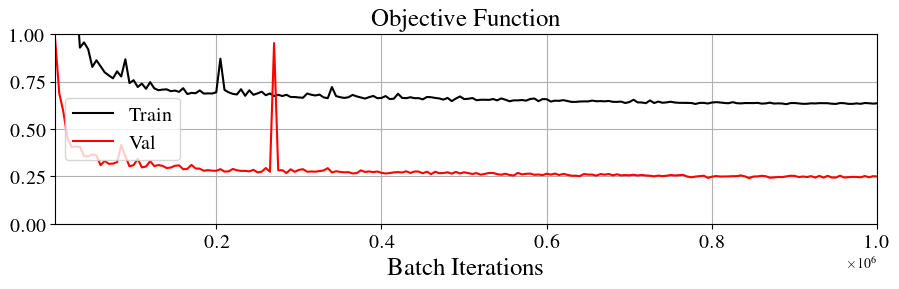

In [2]:
plot_progress(losses, y_lims=[(0,1.)])

## Visualize the masked autoencoding

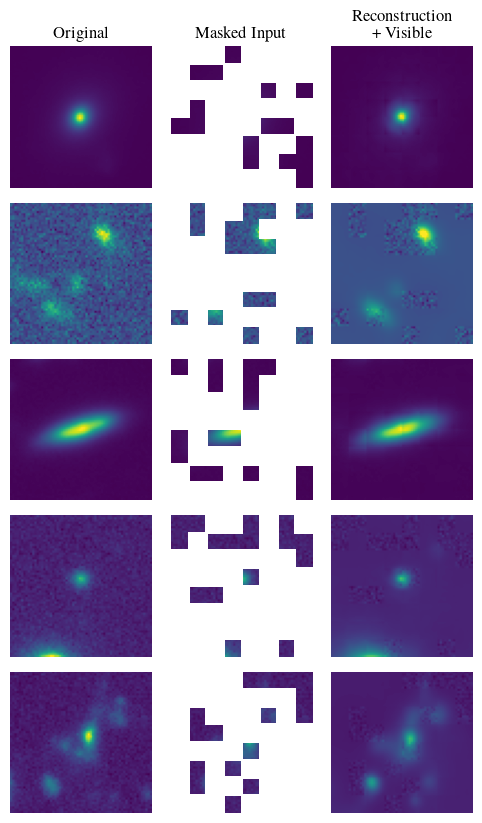

In [5]:
# Run MAE on a single random batch
pred_imgs, mask_imgs, orig_imgs = mae_predict(model, dataloader, 
                                              device, 
                                              float(config['TRAINING']['mask_ratio']), 
                                              single_batch=True)

# Plot the results from 5 samples
plot_batch(orig_imgs, mask_imgs, pred_imgs, n_samples=5, channel_index=0)